PageRanks: [0.35390083 0.18603247 0.3744417  0.025      0.035625   0.025     ]


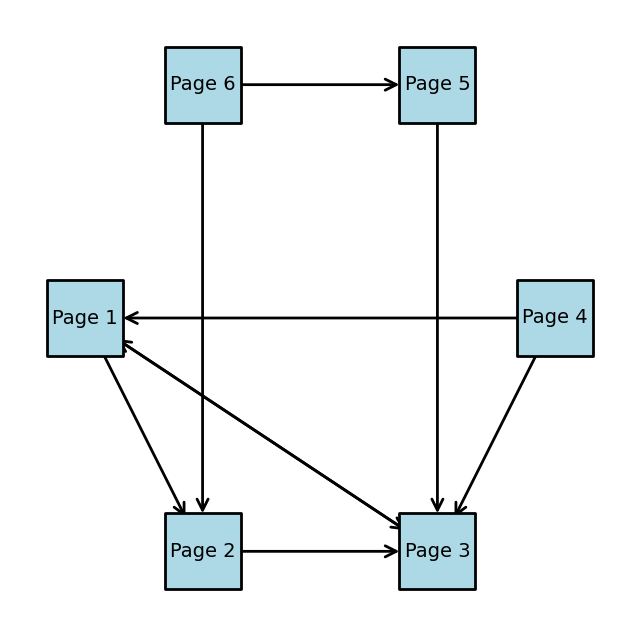

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_transition_matrix(adjacency_matrix, d=0.85):
    N = adjacency_matrix.shape[0]
    c = np.sum(adjacency_matrix, axis=0)
    D_c_inv = np.diag(1 / c)
    transition_matrix = d * adjacency_matrix.dot(D_c_inv) + (1 - d) / N
    return transition_matrix

def power_method(transition_matrix, max_iter=1000, tolerance=1e-6):
    N = transition_matrix.shape[0]
    p = np.ones(N) / N
    for _ in range(max_iter):
        p_next = transition_matrix.dot(p)
        if np.linalg.norm(p_next - p, ord=1) < tolerance:
            break
        p = p_next
    return p

def draw_network(adjacency_matrix, node_labels=None):
    G = nx.from_numpy_array(adjacency_matrix.T, create_using=nx.DiGraph)
    pos = nx.shell_layout(G)

    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(G, pos, node_shape='s', node_size=3000, node_color="lightblue", edgecolors="black", linewidths=2)
    nx.draw_networkx_edges(G, pos, arrowsize=20, node_size=3000, arrowstyle='->', width=2)

    if node_labels:
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14)

    plt.axis('off')
    plt.margins(x=0.1, y=0.1)
    plt.show()

# Define the adjacency_matrix variable according to the network from Figure 14.47
adjacency_matrix = np.array([
    [0, 0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]
], dtype=float)

transition_matrix = create_transition_matrix(adjacency_matrix)
page_ranks = power_method(transition_matrix)

print("PageRanks:", page_ranks)

node_labels = {i: f"Page {i+1}" for i in range(adjacency_matrix.shape[0])}
draw_network(adjacency_matrix, node_labels=node_labels)
